<a href="https://colab.research.google.com/github/vedkhatri/COMM510_Coursework/blob/main/MOEA_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions

from jMetalPy.jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jMetalPy.jmetal.algorithm.multiobjective.ibea import IBEA

from jMetalPy.jmetal.operator import SBXCrossover, PolynomialMutation
from jMetalPy.jmetal.problem.multiobjective.zdt import ZDT1, ZDT2, ZDT3, ZDT4, ZDT6
from jMetalPy.jmetal.problem.multiobjective.dtlz import DTLZ1, DTLZ2, DTLZ3, DTLZ4, DTLZ5, DTLZ6, DTLZ7
from jMetalPy.jmetal.util.termination_criterion import StoppingByEvaluations

from jMetalPy.jmetal.lab.visualization.plotting import Plot
from jMetalPy.jmetal.core.solution import FloatSolution
from jMetalPy.jmetal.util.solution import get_non_dominated_solutions
import matplotlib.pyplot as plt
import numpy as np

from jMetalPy.jmetal.core.quality_indicator import InvertedGenerationalDistance

In [17]:
p = get_problem('zdt1')
#ref_dirs = get_reference_directions('das-dennis', n_dim=3, n_partitions=13)
pareto = p.pareto_front()
print(pareto.shape)

(100, 2)


In [18]:
problem = ZDT1(number_of_variables=30)

max_evaluations = 30e4

algorithm1 = NSGAII(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(probability= 1.0/30.0, distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations)
)

algorithm2 = IBEA(
    problem=problem,
    kappa=1.,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(probability= 1.0/30.0, distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations)
)

algorithm1.run()
algorithm2.run()
solutions1 = algorithm1.get_result()
solutions2 = algorithm2.get_result()

[2023-07-10 15:25:08,896] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2023-07-10 15:25:08,899] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2023-07-10 15:25:08,900] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2023-07-10 15:25:08,901] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2023-07-10 15:26:23,919] [jmetal.core.algorithm] [DEBUG] Finished!
[2023-07-10 15:26:23,919] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2023-07-10 15:26:23,952] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2023-07-10 15:26:23,953] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2023-07-10 15:26:23,954] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2023-07-10 15:35:11,664] [jmetal.core.algorithm] [DEBUG] Finished!


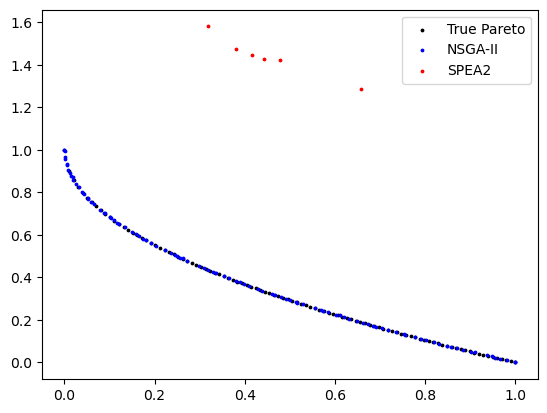

In [19]:
front1 = get_non_dominated_solutions(solutions1)
front2 = get_non_dominated_solutions(solutions2)

nsgaii_front = Plot.get_points(front1)
spea2_front = Plot.get_points(front2)

if len(nsgaii_front[0]) == 3:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(*zip(*pareto), c='k', s=5, label='True Pareto')
    ax.scatter3D(*zip(*nsgaii_front), c='b', s=5, label='NSGA-II')
    ax.scatter3D(*zip(*spea2_front), c='r', s=5, label='SPEA2')

elif len(nsgaii_front[0]) == 2:
    plt.scatter(*zip(*pareto), c='k', s=3, label='True Pareto')
    plt.scatter(*zip(*nsgaii_front), c='b', s=3, label='NSGA-II')
    plt.scatter(*zip(*spea2_front), c='r', s=3, label='SPEA2')

plt.legend()
plt.show()
#nsgaii_plot = plot_front.plot(front1)
#spea2_plot = plot_front.plot(front2, label='SPEA2-ZDT1')

In [20]:
#igd_pi = InvertedGenerationalDistance(front)
#soln = problem.evaluate(solutions)
#igd_pts = igd_pi.compute(soln)
print(len(front1))
print(len(front2))
print(len(pareto))

99
6
100
